In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [6]:
from mlxtend.plotting import plot_decision_regions

In [8]:
data=pd.read_csv("Socialnetworkads.csv")
data.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


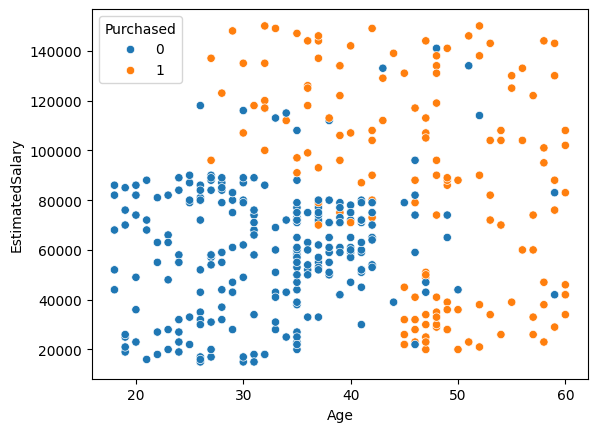

In [10]:
sns.scatterplot(x="Age", y="EstimatedSalary", data=data, hue="Purchased")
plt.show()

In [11]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [16]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [18]:
data.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [20]:
X=data.iloc[:,:-1]
Y=data["Purchased"]

In [22]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [24]:
#Feature Scalling 
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()
sc.fit(X)
X=pd.DataFrame(sc.transform(X),columns=X.columns)

In [28]:
X

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(320, 2)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
dt= DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
dt.score(X_test,Y_test)*100

83.75

In [42]:
dt.predict([[19,19000]])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [44]:
dt.predict([[35,20000]])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

C:\Users\Utkarsha\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


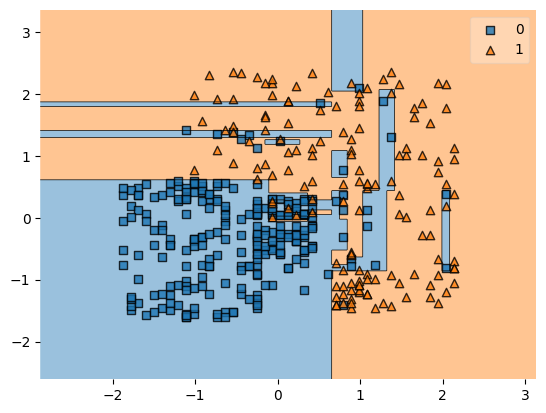

In [56]:
plot_decision_regions(X.to_numpy(),Y.to_numpy(),clf=dt)
plt.show()

In [46]:
#Graph
from sklearn.tree import plot_tree

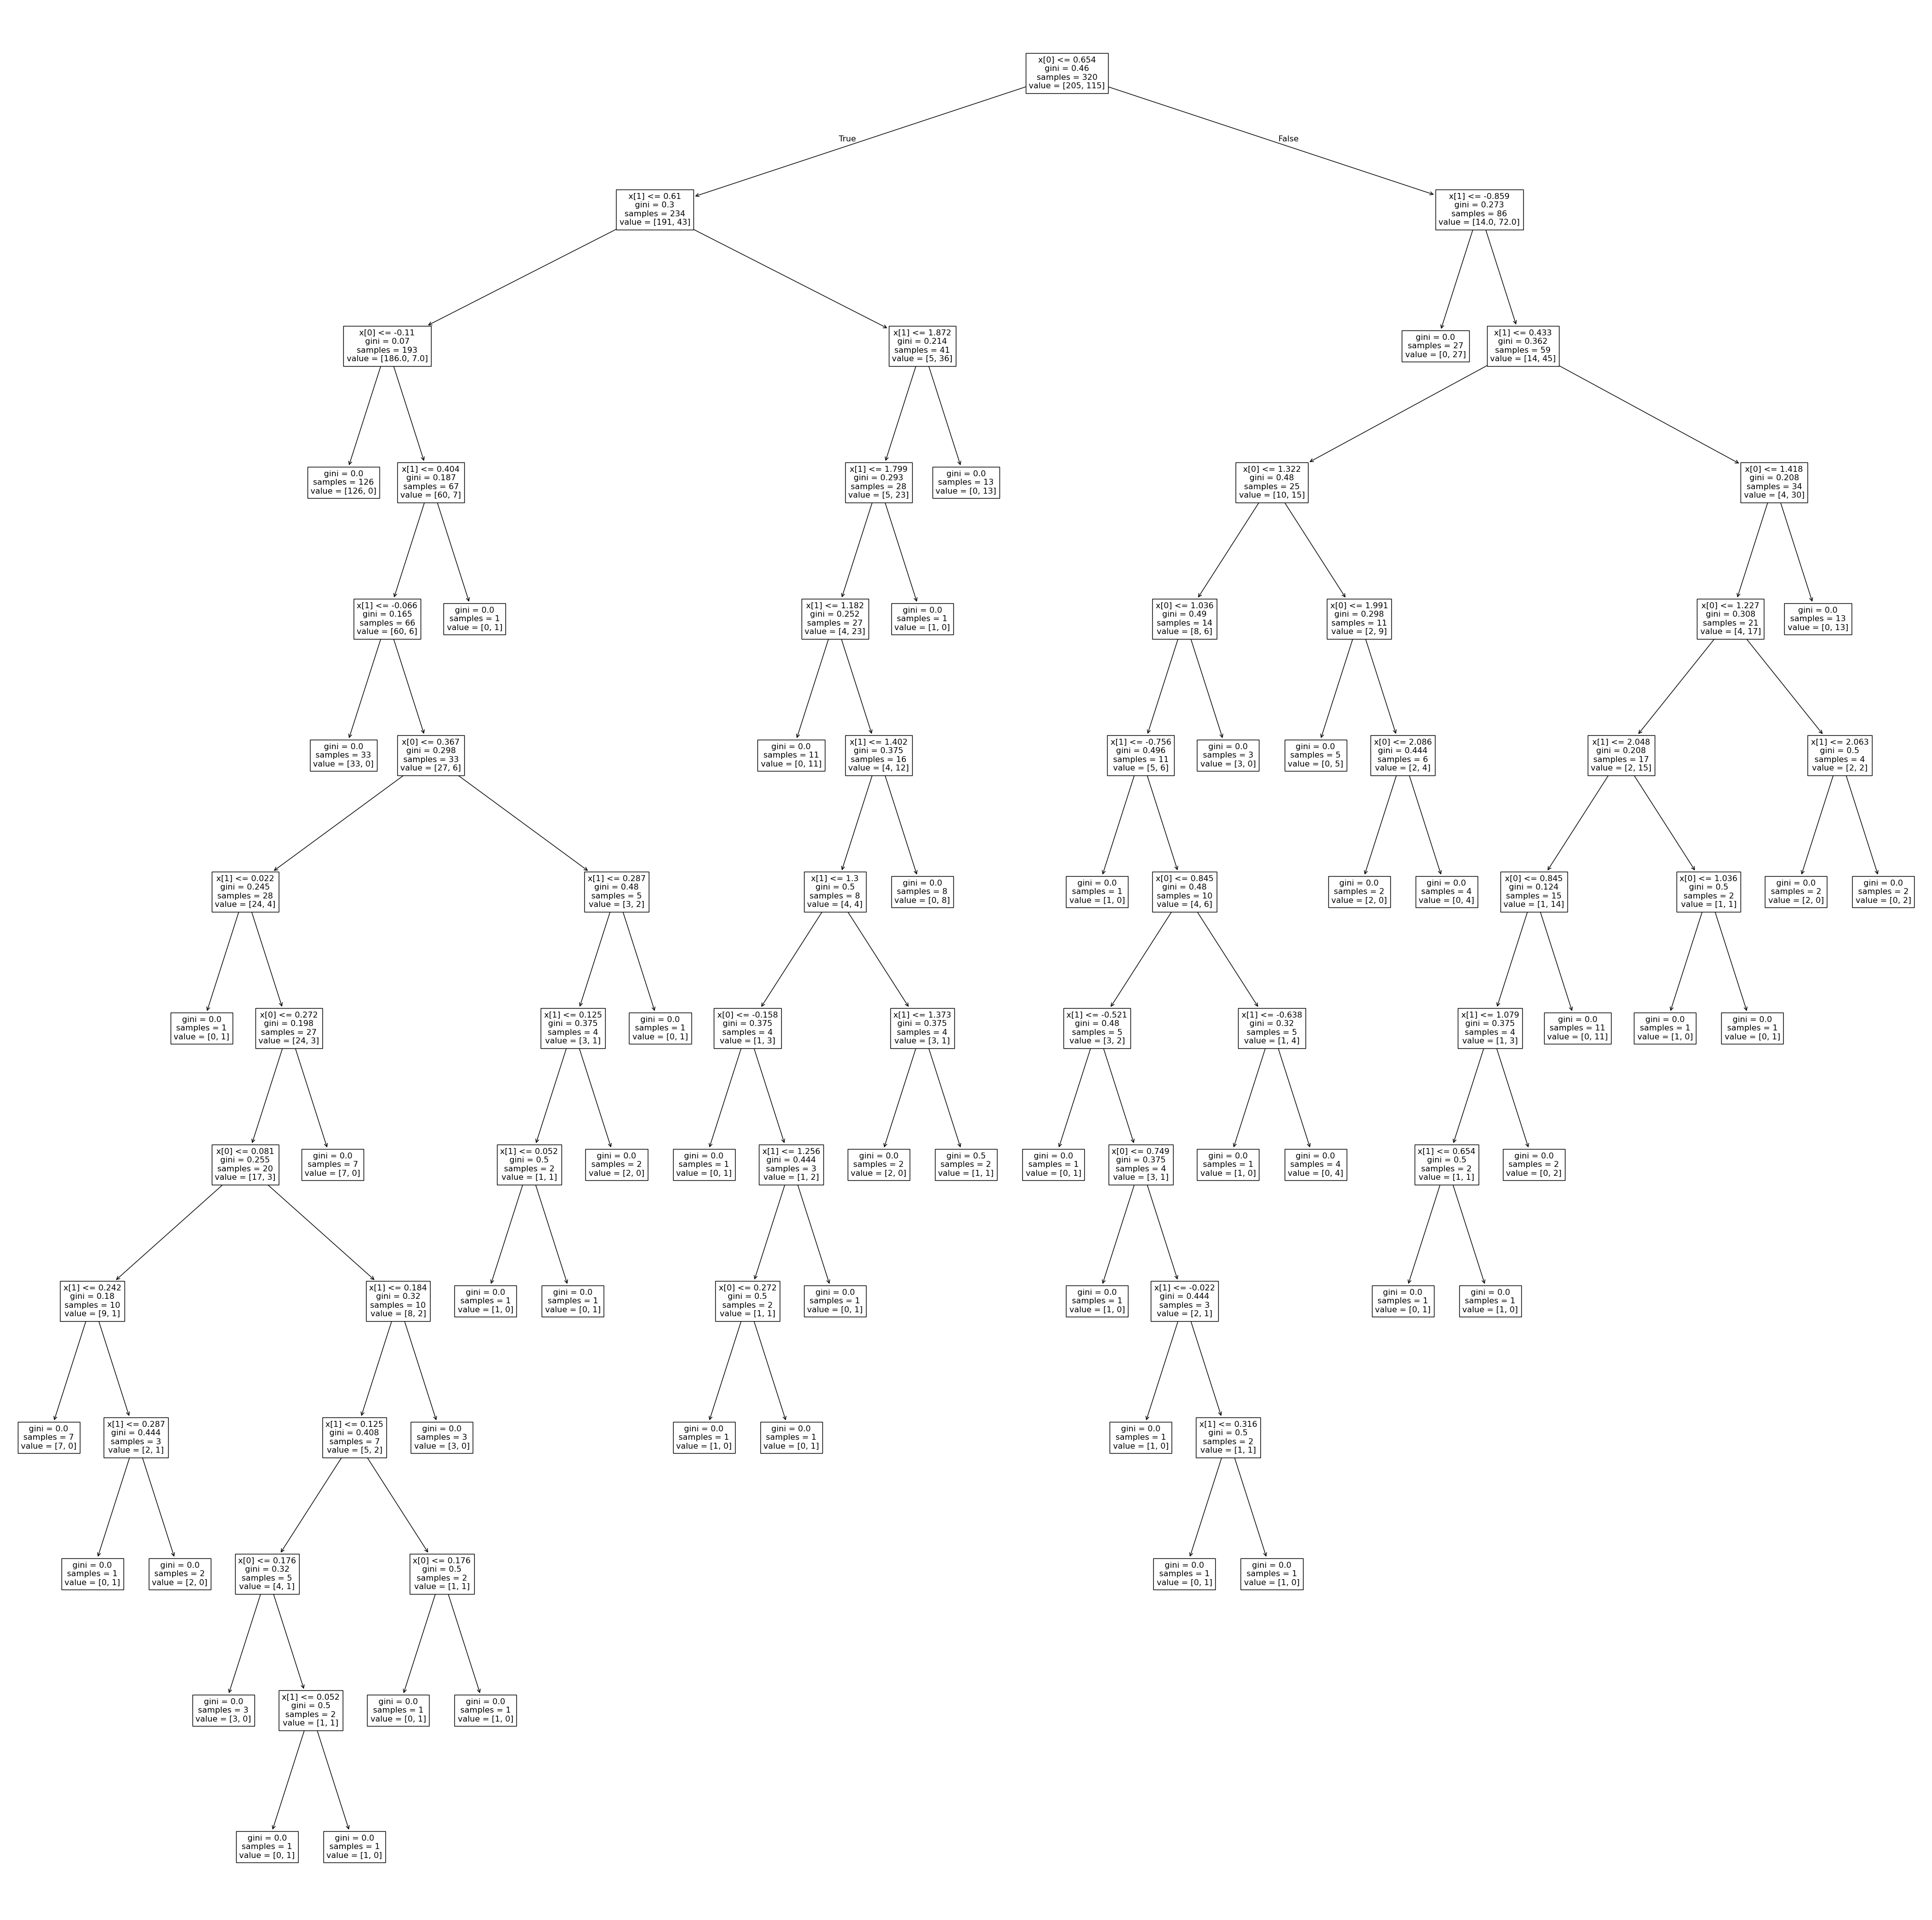

In [48]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig("DT.jpg")
plt.show()